# 1.

In [1]:
#import libraries
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
import pandas as pd

Using TensorFlow backend.


In [2]:
#define corpus

corpus=['This is good pizza','I love Italian pizza','The best pizza', 'nice pizza', 'Excellent pizza', 'I lovevpizza', 'The pizza was alright', 'disgusting pineapple pizza', 'not good pizza', 'bad pizza', 'very bad pizza', 'I had better pizza']

In [3]:
#creating class label
labels= array([1,1,1,1,1,1,0,0,0,0,0,0])

output_dim=8
pd.dataframe=({'text': corpus, 'sentiment': labels})

In [4]:
#extracting vocab from corpus
sentences=[voc.split() for voc in corpus]
vocabulary= set([word for sentence in sentences for word in sentence])

vocab_size= len(vocabulary)
encoded_corpus=[one_hot(d,vocab_size) for d in corpus]

encoded_corpus

[[2, 14, 14, 10],
 [9, 11, 5, 10],
 [17, 16, 10],
 [1, 10],
 [9, 10],
 [9, 2],
 [17, 10, 12, 6],
 [1, 10, 10],
 [16, 14, 10],
 [16, 10],
 [3, 16, 10],
 [9, 19, 14, 10]]

In [5]:
max_length=5
padded_docs=pad_sequences(encoded_corpus, maxlen=max_length,padding='post')
print(padded_docs)

[[ 2 14 14 10  0]
 [ 9 11  5 10  0]
 [17 16 10  0  0]
 [ 1 10  0  0  0]
 [ 9 10  0  0  0]
 [ 9  2  0  0  0]
 [17 10 12  6  0]
 [ 1 10 10  0  0]
 [16 14 10  0  0]
 [16 10  0  0  0]
 [ 3 16 10  0  0]
 [ 9 19 14 10  0]]


In [6]:
#define model
model=Sequential()
model.add(Embedding(vocab_size,output_dim,input_length=max_length,name='embedding'))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

#compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

#summarize the model
print(model.summary())

#fit model
model.fit(padded_docs,labels,epochs=50,verbose=0)

#evaluate model
loss,accuracy=model.evaluate(padded_docs,labels,verbose=0)

print('Accuracy: %f' % (accuracy*100))




          

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5, 8)              168       
_________________________________________________________________
flatten_1 (Flatten)          (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________
None


C:\Users\Prashant Mourya\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Accuracy: 83.333331


Conclusion: The model output has a good accuracy score.The model represents a vectorized representation of the actual world which is found in the embedding layer.

# 2.

In [7]:
#Importing the Required Libraries
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
#Importing the Dataset
data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
airline_tweets = pd.read_csv(data_source_url)

In [9]:
airline_tweets.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [10]:
#Data Analysis

plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


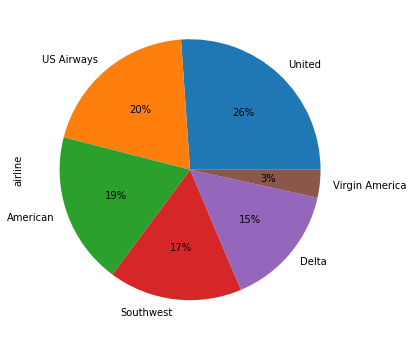

In [11]:
#Plotting the shares of airlines mentioned in the data.
airline_tweets.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

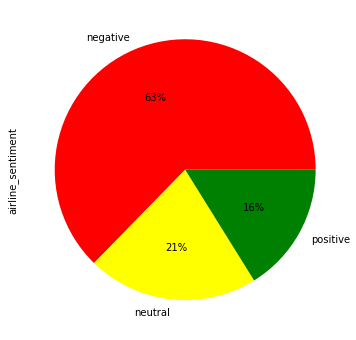

In [12]:
#Plotting the percentage of positive, negative, and neutral sentiments.
airline_tweets.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

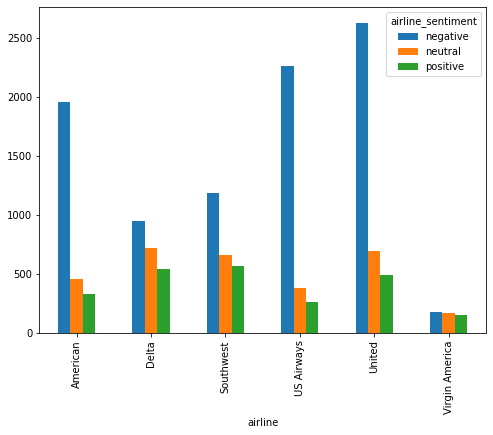

In [13]:
#Ploting bar chart to show the number of positive, negative, and neutral comments by airline.
airline_sentiment = airline_tweets.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')

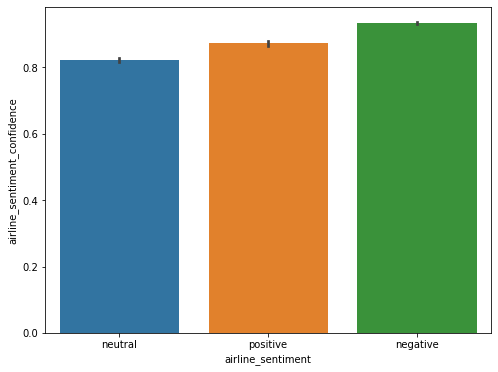

In [14]:
#Using Seaborn to show airlines sentiment confidence.

import seaborn as sns

sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)

In [15]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

In [16]:
#clean tweets
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)


In [17]:
#vectorizing tweets
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)


In [19]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [20]:
predictions = text_classifier.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[1723  108   39]
 [ 326  248   40]
 [ 132   58  254]]
              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995


After performing analysis of public tweets regarding six US airlines we achieved an accuracy of around 75%. The sentiment analysis is quite possibly the most regularly performed NLP tasks as it decides in general popular assessment on a specific topic.